# Recommender System Based on Product Image
---

## Description
- In this project I developed a method for identifiying the similar products visually. The taks was implementing an algorithm to find k most similar images to given(original) product and display it to user.

# Data
- The main dataset is 2184 color images (150x150x3) with 7 brands and 10 products, and the file with labels style.csv. Photo files are in the .png format and the labels are integers and values. It is downloaded from [kaggle](https://www.kaggle.com/olgabelitskaya/style-color-images). 

# High Level Overview on the Algorithm
---

### Step 1 - Feature Extraction
- We need to `extract` the images features using CNN model. We dont have to train our model, we can make a use of Transfer Learning. In this project I used VGG16. VGG16 is a (16) convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. Below you can see the architecture of the VGG16.
---

![VGG16](https://images.squarespace-cdn.com/content/v1/5a2de417914e6b4aaeea995b/1525872902098-QW6NRHPM5ZLJIM5PSRF2/ke17ZwdGBToddI8pDm48kOoZH-sodpzcMRRauuCS1UkUqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYy7Mythp_T-mtop-vrsUOmeInPi9iDjx9w8K4ZfjXt2duvkIE4SzlVg1IA40TSl2Iz7vx7ZI2AaZCvRLajMU_LSpC969RuPXvt2ZwyzUXQf7Q/VGG16-2.jpg?format=1500w)

### Step 2 - Calculate the Similarity Score
- Once we have the image features, we can calculate the similarity score among all images. I used `cosine_similarity` score from `sklearn metrics package`. Cosine similariry metrics is widely-used when finding a similarty score between two vectors. Once we calculate the cosine similarity score, we can store it in csv file so we can later sort and use the closer score and images.
---

### Step 3 - Return K most similar items to chosen product.
- In this step all we do is sort the cosine similarity score dataframe, and return k most similar products which has higher score(closer to original product).
---

## 1. Importing Packages and Setup the Parameters
---

In [37]:
from keras.models import Model
from keras.applications import vgg16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity

import os
import numpy as np
import pandas as pd
from PIL import Image
# visualize the images
import matplotlib.pyplot as plt


## 2. Explore the data

In [114]:
root_dir = "data/images/"
imgs_model_width, imgs_model_height = 224, 224
csv_file = "data/style.csv"
style_df = pd.read_csv(csv_file)

In [115]:
style_df.head()

,brand_name,brand_label,product_name,product_label,file
0,Christian Louboutin,0,shoes,0,0_0_001.png
1,Christian Louboutin,0,shoes,0,0_0_002.png
2,Christian Louboutin,0,shoes,0,0_0_003.png
3,Christian Louboutin,0,shoes,0,0_0_004.png
4,Christian Louboutin,0,shoes,0,0_0_005.png


##### Observation:
- So we can see that we know the product name but not the specific type. For example shoes, but what kind of shoes sandals, or sneakers.

In [126]:
def display_number_unique_products(unique_products):
    """Displays unique products from the dataset"""
    
    print("There is {} number of unique products.".format(len(unique_products)))
    for index, product in enumerate(unique_products):
        print(index+1, product)

In [127]:
# how many unique product names:
unique_products = style_df["product_name"].unique()
display_number_unique_products(unique_products)

There is 10 number of unique products.
1 shoes
2 lipstick
3 handbag
4 nail polish
5 boots
6 necklace
7 watches
8 ring
9 bracelet
10 earrings


In [148]:
def get_product_name(df, image_id):
    """
        Get the product name to display.
        
        Args:
            df(panda DataFrame): Dataframe of the dataset
            image_id(str): filename of the image
        
        Returns:
            product_name(str): type of the given image
    """
    # finds the items from file column and returs the coresponding value from product name column
    product_name = df[df['file'] == image_id]['product_name'].iloc[0]
    return product_name

In [149]:
print(get_product_name(style_df, all_image_ids[0]))

shoes


## 3. Display samples from dataset
---

## 4. Initilize he Model 
- Initilize the model 
- Remove the last year, because we only need the features not the prediction

In [90]:
# initialize
vgg_model = vgg16.VGG16(weights='imagenet')

# ignore the last layer
feature_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# layers of model
feature_extractor.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

## 5. Read all image ids and store them in the list

In [50]:
def get_all_image_ids(filepath):
    """
    Get all image file names from dataset.
    
    Args:
        filepath(str): Root file path to images
        
    Returns:
        image_ids(list): list of all image ids
    """
    image_ids = []
    # read from directory
    for img in os.listdir(filepath):
        # append all files end with png
        if img.endswith('png'):
            image_ids.append(img)
    
    return image_ids


In [94]:
all_image_ids = get_all_image_ids(root_dir)
print("Number of images:",len(all_image_ids))
print(all_image_ids[0])

Number of images: 2184
6_0_003.png


## 6. Display an image
- We have seen some sample from the dataset, lets look at single product image.

In [112]:
def display_image(filepath, image_id):
    """
        Displays an image from dataset, using plt library
        
        Args:
            filepath(str): file path to dataset
            image_id(str): filename of the specific image, the format looks like -> 6_0_003.png
    """
    """Displays the given image id from folder"""
    filename = filepath + image_id
    original = load_img(filename, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
#     image_title = 
    plt.title(image_id[:-4])
    plt.show()
   
    # TODO: display item label
    print("image loaded successfully!")

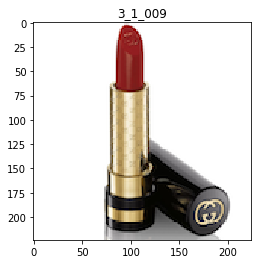

image loaded successfully!


In [113]:
image_id = 33
display_image(root_dir, all_image_ids[image_id])

## 7. Extracting Image Features:
1. Preprocessing the image for vgg
1. Extract the image feature using vgg

In [55]:
# convert an image to numpy array
numpy_image = img_to_array(original)

# convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# we want the input matrix to the network to be of the form (batchsize, height, width, channels)
# thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)

# prepare the image for the VGG model
processed_image = preprocess_input(image_batch.copy())

image batch size (1, 224, 224, 3)


In [56]:
# get the extracted features
img_features = feature_extractor.predict(processed_image)

print("features successfully extracted!")
print("number of image features:",img_features.size)
img_features

features successfully extracted!
number of image features: 4096


array([[0.        , 0.        , 0.        , ..., 0.16508457, 0.        ,
        0.774067  ]], dtype=float32)

### 7.1 Now We can extract image feature for all images.

In [60]:
def process_image_for_feature_extraction(filepath, all_image_ids):
    """
        Takes an image and returns 4D array of features from vgg16 model

        Args:
            image_path: path to image
        
        Returns:
            processed_imgs(list): list of procesed numpy array ready to pass to VGG
    """

    # load all the images and prepare them for feeding into the CNN

    imported_images = []

    for image_id in all_image_ids:
        filename = filepath + image_id
        original = load_img(filename, target_size=(imgs_model_width, imgs_model_height))
        numpy_image = img_to_array(original)
        image_batch = np.expand_dims(numpy_image, axis=0)

        imported_images.append(image_batch)
    
    # stack up the vertically
    images = np.vstack(imported_images)

    processed_imgs = preprocess_input(images.copy())
    
    return processed_imgs


In [61]:
# extract the images features
processed_imgs = process_image_for_feature_extraction(root_dir, all_image_ids)


In [62]:
all_image_features = feature_extractor.predict(processed_imgs)

print("Extracted the features!")
all_image_features.shape

features successfully extracted!


(2184, 4096)

## 8. Compute cosine similarities between images

In [64]:
def create_cosine_similarity_table(image_features, image_ids):
    # print(len(all_image_ids))
    cos_sims = cosine_similarity(image_features)

    # store the results into a pandas dataframe

    cos_sims_df = pd.DataFrame(cos_sims, columns=image_ids, index=image_ids)
    # store it in csv file
    # if you are running this code first time comment this off, it will create a csv file with all the cos similarity
    # cos_sims_df.to_csv('cos_sim_table_2154_images.csv', sep='\t', encoding='utf-8')
    
    return cos_sims_df
    

In [67]:
cos_sim_df = create_cosine_similarity_table(all_image_features, all_image_ids)

In [150]:
cos_sim_df.head(10)

,6_0_003.png,1_6_022.png,6_0_017.png,4_3_008.png,3_5_015.png,4_3_020.png,3_5_001.png,5_0_037.png,6_1_012.png,2_6_002.png,...,3_5_024.png,3_8_013.png,4_3_011.png,3_8_007.png,4_3_005.png,6_0_032.png,1_6_007.png,1_6_013.png,6_0_026.png,4_5_040.png
6_0_003.png,1.000000,0.299125,0.518684,0.174802,0.333239,0.266725,0.392272,0.376877,0.252635,0.193925,...,0.240589,0.494327,0.187345,0.471302,0.154504,0.498736,0.266930,0.261526,0.423063,0.157303
1_6_022.png,0.299125,1.000000,0.293150,0.253284,0.450366,0.425364,0.471757,0.271566,0.199947,0.318290,...,0.364141,0.252816,0.290965,0.325775,0.187361,0.255963,0.499326,0.384587,0.316344,0.236377
6_0_017.png,0.518684,0.293150,1.000000,0.274508,0.281128,0.250835,0.292203,0.453911,0.198865,0.188447,...,0.214745,0.430328,0.212879,0.417788,0.197296,0.562664,0.337275,0.269246,0.364765,0.175194
4_3_008.png,0.174802,0.253284,0.274508,1.000000,0.304643,0.436987,0.257100,0.216678,0.258096,0.174308,...,0.219258,0.243954,0.253297,0.261905,0.735227,0.200664,0.277295,0.277701,0.380281,0.169136
3_5_015.png,0.333239,0.450366,0.281128,0.304643,1.000000,0.524763,0.602443,0.282384,0.436038,0.255400,...,0.364642,0.328726,0.383658,0.337313,0.291866,0.309710,0.366534,0.369775,0.342702,0.388611
4_3_020.png,0.266725,0.425364,0.250835,0.436987,0.524763,1.000000,0.309033,0.300580,0.388621,0.234951,...,0.310858,0.222687,0.377547,0.351808,0.307429,0.287178,0.390341,0.290160,0.358314,0.208980
3_5_001.png,0.392272,0.471757,0.292203,0.257100,0.602443,0.309033,1.000000,0.324588,0.323704,0.224871,...,0.393991,0.355931,0.284988,0.423896,0.252270,0.345956,0.404511,0.395048,0.363942,0.413742
5_0_037.png,0.376877,0.271566,0.453911,0.216678,0.282384,0.300580,0.324588,1.000000,0.252033,0.229261,...,0.181397,0.287082,0.192636,0.324839,0.205137,0.372011,0.381613,0.215555,0.341537,0.148838
6_1_012.png,0.252635,0.199947,0.198865,0.258096,0.436038,0.388621,0.323704,0.252033,1.000000,0.161363,...,0.201179,0.212020,0.326088,0.201862,0.218097,0.229935,0.268687,0.184451,0.302330,0.260285
2_6_002.png,0.193925,0.318290,0.188447,0.174308,0.255400,0.234951,0.224871,0.229261,0.161363,1.000000,...,0.127768,0.258739,0.222262,0.212886,0.182119,0.201444,0.259161,0.138902,0.190213,0.134110


## Recommend k most similar products:
- We sort the scores by descending order and return k most closest score to original item.

In [190]:
def get_k_most_similar_images(df, filepath, image_id, k_similar=3):
    
    print("====================== Original Product =================================")
    filename = filepath + image_id
    original = load_img(filename, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()
    # get most k similar images
    k_similar_images = df[image_id].sort_values(ascending=False)[1:k_similar+1].index
    # get most k similar image scores
    k_similar_image_scores = df[image_id].sort_values(ascending=False)[1:k_similar+1]
    
    
    for i in range(0,len(k_similar_images)):
        print("======================Recommended Item {}=================================".format(i+1))
        score = k_similar_image_scores[i]
        item_i = k_similar_images[i]
        filename = filepath + k_similar_images[i]
        similar = load_img(filename, target_size=(imgs_model_width, imgs_model_height))
        print()
        # get the image title
        image_title = get_product_name(style_df, item_i)
        plt.title(image_title)
        plt.imshow(similar)
        plt.show()
        print("recommended item {}, with similarity score {}".format(i+1, score))
        print()
#         print("similarity score : ",k_similar_image_scores[i])

====================== Original Product =================================


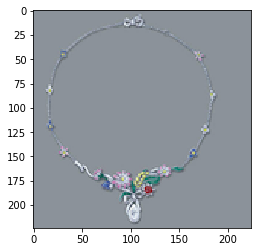

======================Recommended Item 1=================================



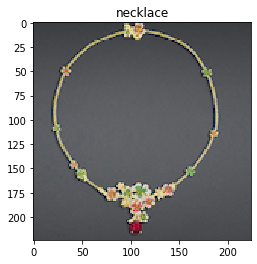

recommended item 1, with similarity score 0.8430893421173096

======================Recommended Item 2=================================



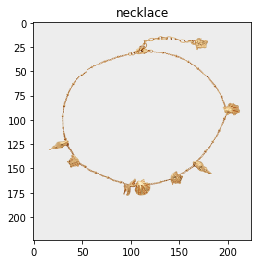

recommended item 2, with similarity score 0.823442816734314

======================Recommended Item 3=================================



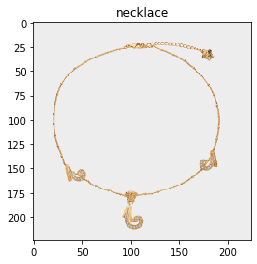

recommended item 3, with similarity score 0.8196035027503967



In [191]:
img_id = 1243
get_k_most_similar_images(cos_sim_df, root_dir, all_image_ids[img_id])

## Final Thoughts.
- We can improve the accuracy of recommending even more similar images
    1. We can specify the type of the product, gender, or even brand
- Other approaches
    1. So far we leveraged transfer learning and cosine similarity
    2. The other option would be to create an autoencoder to extract the features of the image
    3. For finding the similarity metrics would be K-means clusetering. Once we have clusters, we can choose an image and return k nearest neighbors. 